<a href="https://colab.research.google.com/github/shobs315/DeepLearning/blob/main/Single_Prompt_Input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install scipy==1.10.* diffusers[torch]==0.7.* ftfy==6.1.* gitpython==3.1.* ligo-segments==1.4.* torchvision==0.14.* transformers==4.21.*

In [ ]:
import torch
!pip install transformers
#!pip install huggingface_hub
#!pip install diffusers[torch]==0.7.* ftfy==6.1.* gitpython==3.1.* ligo-segments==1.4.* transformers==4.21.*
!pip install --upgrade diffusers transformers scipy

from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "a logo for a real estate company called myOriginHomes"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

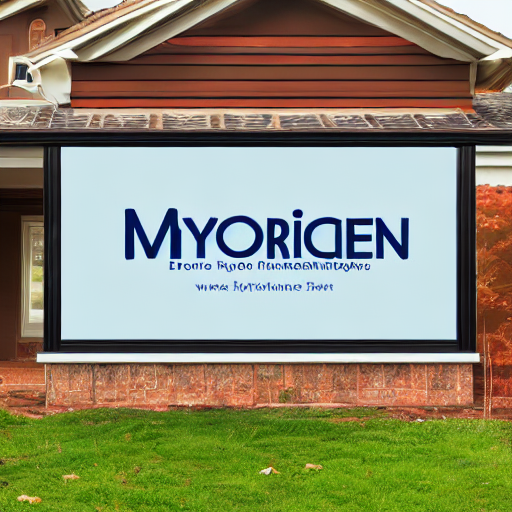

In [ ]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

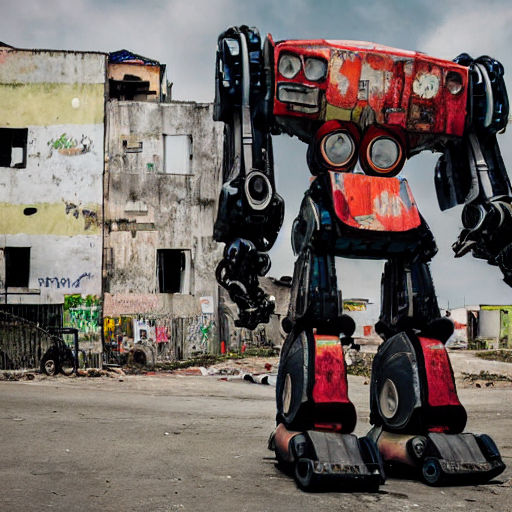

In [ ]:
#model_id = "CompVis/stable-diffusion-v1-4"
#device = "cuda"

#pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
#pipe = pipe.to(device)

prompt = "A mecha robot in a favela in expressionist style"
image = pipe(prompt).images[0]

image.save("robot_in_favela.png")
image

In [ ]:
import Image2ImageRegion, RerollRegion, StableDiffusionCanvasPipeline, Text2ImageRegion
import preprocess_image
import StableDiffusionTilingPipeline

# Creater scheduler and model (similar to StableDiffusionPipeline)
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipeline = StableDiffusionTilingPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", scheduler=scheduler, use_auth_token=True).to("cuda:0")

# Mixture of Diffusers generation
image = pipeline(
    prompt=[[
        "A charming house in the countryside, by jakub rozalski, sunset lighting, elegant, highly detailed, smooth, sharp focus, artstation, stunning masterpiece",
        "A dirt road in the countryside crossing pastures, by jakub rozalski, sunset lighting, elegant, highly detailed, smooth, sharp focus, artstation, stunning masterpiece",
        "An old and rusty giant robot lying on a dirt road, by jakub rozalski, dark sunset lighting, elegant, highly detailed, smooth, sharp focus, artstation, stunning masterpiece"
    ]],
    tile_height=640,
    tile_width=640,
    tile_row_overlap=0,
    tile_col_overlap=256,
    guidance_scale=8,
    seed=7178915308,
    num_inference_steps=50,
)["sample"][0]